In [ ]:
%load_ext autoreload
%autoreload 2
from binarysearch import *

## Exponents

We'll start the course by talking about exponents.  The definition we'll use is

$a^b = a \times a \times a \times ... \times a$ ($b$ times)

For instance, $2^4 = 2 \times 2 \times 2 \times 2 = 16$

In python, doing an exponential is quite simple; we just say a ** b.  For instance

In [1]:
2**4

16

Now let's dive right into an application of exponents to computer science.  We'll start by asking how many different binary strings (strings that only use 1's and 0's) there are with $N$ digits.  For instance, there are 8 binary strings with 3 digits: $000, 001, 010, 011, 100, 101, 110, 111$.  There's a very nice way to organize these into a binary tree structure to find a general formula.  Let's have a look below for our example with $N = 3$:

<img src = "TreeBinary3Digit.svg" width=50%>

We start with one node at the top of the tree, and then for every digit, we branch out both to the left (which we consider to be a 0) and to the right (which we consider to be a 1).  Then, for each of those branches, we can continue to recursively branch in this way to get to the next digit.  In this way, a binary string can be obtained by following some path down from the root of the tree to a leaf.  For instance, the string 101 can be obtained by going RIGHT, LEFT, RIGHT.  So we just have to count the number of leaves there are to count the number of unique binary numbers.  We notice that the number of nodes doubles at each step we go down the tree, so the total number of nodes is $2 \times 2 \times ... \times 2$ N times, or simply $2^N$!

## Subset Sum And Exponential Algorithms

Let's now look at a computational problem and an algorithm to solve it that takes "exponential time" as a function of the size of the input $N$.  

The <b>subset sum problem</b> asks if we start with an array of numbers $X$ and a target number $T$, is it possible to pick some subset of numbers in $X$ that sum to $T$?  

-------
Ex) As an example, consider $X = [1, 5, 2, 6, 3, 1, 2]$ and $T = 7$.  Then there are a few different ways to satisfy this problem.  For instance, we can take

$X[1] + X[2] = 5 + 2 = 7$

$X[3] + X[5] = 6 + 1 = 7$

$X[0] + X[3] = 1 + 6 = 7$

$X[0] + X[2] + X[4] + X[5] = 1 + 2 + 3 + 1 = 7$

-------

A brute force algorithm would try all possible subsets of numbers and check to see if they sum to the target.  But how long will this algorithm take?  To see this, we can come up with a binary string that corresponds to each possible subset.  The table below shows how

<table>
    <tr><td></td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
    <tr><td>X[1]+X[2]</td><td>0</td><td>1</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>X[3]+X[5]</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><td>X[0]+X[3]</td><td>1</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><td>X[0] + X[2] + X[4] + X[5]</td><td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
</table>

In other words, we put a $1$ in the $i^{\text{th}}$ place if the number at index $i$ is a part of the sum, and a $0$ otherwise.  Since there is a one to one correspondence between binary digits and subsets, we see that there must be $2^N$ possible subsets, since we know there are $2^N$ possible binary strings with $N$ digits.  Therefore, the naive algorithm has to loop through $2^N$ possibilities.  We refer to such an algorithm as an <b>exponential algorithm</b>.  Let's have a look at how we might implement this in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = [1, 5, 2, 6, 3, 1, 2]
L = 7
N = len(X)

for i in range(2**N): # for (int i = 0; < 2^N; i++)
    ## Step 1: Convert this number into binary, zeropadded on the left
    ## so that it has N digits
    b = [int(x) for x in bin(i)[2::]]
    if len(b) < N:
        b = [0]*(N-len(b)) + b
    ## Step 2: Pull out all of the numbers from the list X where
    ## there's a 1 in the binary number
    Xi = []
    for k in range(len(b)):
        if b[k] == 1:
            Xi.append(X[k])
    ## Step 3: Check the sum, and report it if it's right
    if sum(Xi) == L:
        print(Xi)

[6, 1]
[2, 3, 2]
[5, 2]
[5, 2]
[1, 3, 1, 2]
[1, 6]
[1, 2, 3, 1]
[1, 5, 1]


But how bad is this really?  To see this, let's plot $2^N$ as a function of $N$ for the first 20 integers

Text(0, 0.5, 'Number of binary strings with $N$ digits')

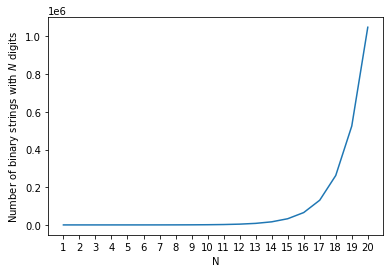

In [2]:
N = np.arange(1, 21)
plt.plot(N, 2**N)
plt.xticks(N);
plt.xlabel("N");
plt.ylabel("Number of binary strings with $N$ digits")

We can see that for $N = 20$, we have just over a million subsets to try

In [16]:
time_per_subset = 1e-6
N1 = 50
N2 = 30
total_subsets = 2**N
print(total_subsets*time_per_subset / (3600*24*365))

3.404812988330796e-05


In [14]:
2**20

1048576

In [ ]:
for (int i = 0; i < 100; i++) {
    
}

In [24]:
x = 0
for i in range(100):
    x = x + 2
    if i >= 50:
        x = x + 3
print(x)

350


Repeatedly divide things in half until I get to 1

7
9


Text(0, 0.5, '$log_2(N)$')

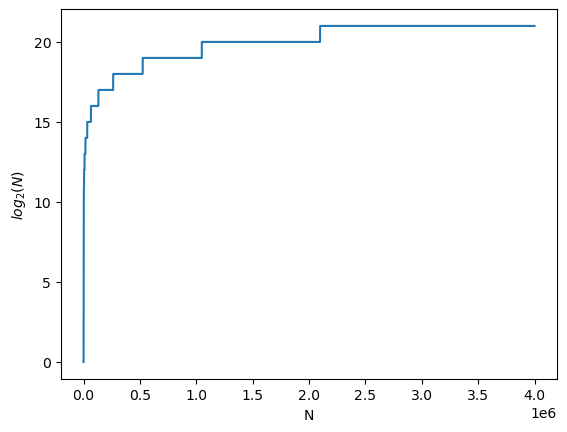

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def log2(N):
    res = 0
    while N > 1:
        N = N // 2
        res = res + 1
    return res

print(log2(128))
print(log2(1000))

Ns = np.arange(1, 4000000, 1000)
logs = [log2(N) for N in Ns]
plt.plot(Ns, logs)
plt.xlabel("N")
plt.ylabel("$log_2(N)$")

In [37]:
log2(50000)

15

In [30]:
58.5//10

5.0